### Stock Analysis

* Importing historical stock data
* Calculating moving averages
* Calculating returns and cumulative returns
* Visualizing historical stock data

In [44]:
import pandas as pd
import pandas_datareader as web
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns
sns.set_style('darkgrid')

In [45]:
ticker = 'SPY'
start = '2020/01/01'
end = pd.to_datetime('today')
df = web.DataReader(ticker,'yahoo', start, end)

In [46]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,318.914307
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,316.499451
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,317.706909
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,316.813568
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,318.502075


In [47]:
adj_close = pd.DataFrame(df['Adj Close'])
adj_close['future_1d'] = adj_close['Adj Close'].shift(-1)
adj_close['previous_1d'] = adj_close['Adj Close'].shift(1)

In [48]:
adj_close.head(5)

,Adj Close,future_1d,previous_1d
Date,,,
2020-01-02,318.914307,316.499451,NaN
2020-01-03,316.499451,317.706909,318.914307
2020-01-06,317.706909,316.813568,316.499451
2020-01-07,316.813568,318.502075,317.706909
2020-01-08,318.502075,320.661682,316.813568


In [49]:
adj_close['pct_change'] = adj_close['Adj Close'].pct_change() * 100

In [50]:
adj_close.head()

,Adj Close,future_1d,previous_1d,pct_change
Date,,,,
2020-01-02,318.914307,316.499451,NaN,NaN
2020-01-03,316.499451,317.706909,318.914307,-0.757212
2020-01-06,317.706909,316.813568,316.499451,0.381504
2020-01-07,316.813568,318.502075,317.706909,-0.281184
2020-01-08,318.502075,320.661682,316.813568,0.532966


In [51]:
adj_close['SMA12'] = adj_close['Adj Close'].rolling(12).mean()
adj_close['SMA26'] = adj_close['Adj Close'].rolling(26).mean()

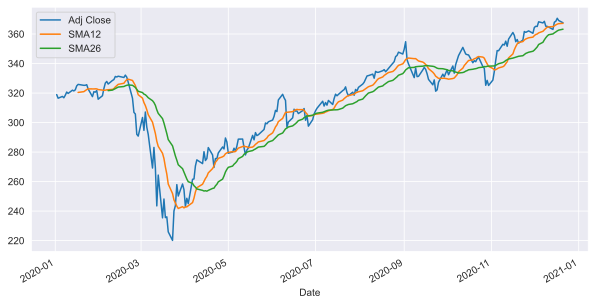

In [52]:
adj_close[['Adj Close', 'SMA12', 'SMA26']].plot(figsize=(10,5))
plt.show()

In [53]:
adj_close.loc['2020-03':]

,Adj Close,future_1d,previous_1d,pct_change,SMA12,SMA26
Date,,,,,,
2020-03-02,303.423584,294.735870,290.828827,4.330643,316.554245,320.339264
2020-03-03,294.735870,307.124481,303.423584,-2.863230,313.542163,319.262073
2020-03-04,307.124481,296.915161,294.735870,4.203293,311.518288,318.860343
2020-03-05,296.915161,292.006836,307.124481,-3.324164,308.714808,317.937953
2020-03-06,292.006836,269.202698,296.915161,-1.653107,305.370598,316.836976
...,...,...,...,...,...,...
2020-12-15,368.021240,368.598816,363.112183,1.351940,365.508634,360.807006
2020-12-16,368.598816,370.660004,368.021240,0.156941,366.181600,361.404843
2020-12-17,370.660004,369.179993,368.598816,0.559195,366.697734,362.101871


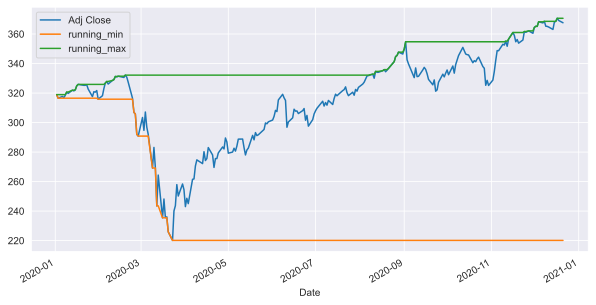

In [58]:
#Getting Running Minimum & Maximum
adj_close['running_min'] = adj_close['Adj Close'].expanding().min()
adj_close['running_max'] = adj_close['Adj Close'].expanding().max()
adj_close[['Adj Close', 'running_min', 'running_max']].plot(figsize=(10,5))
plt.show()

In [54]:
#Calculate returns in percentages
adj_close['returns'] = adj_close['Adj Close'].pct_change().add(1).cumprod().sub(1).mul(100)

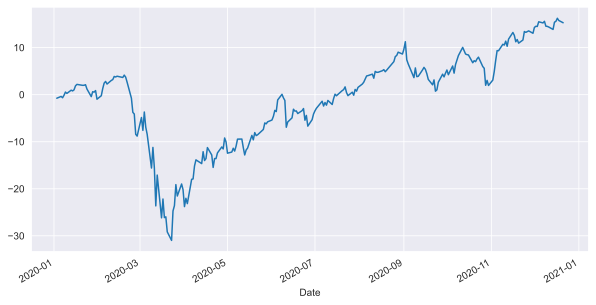

In [55]:
adj_close['returns'].plot(figsize=(10,5))
plt.show()

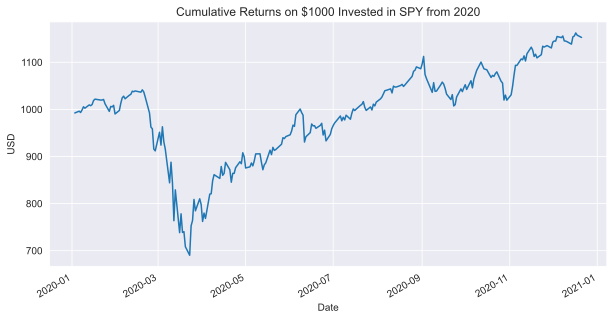

In [66]:
investment = 1000
returns = adj_close['Adj Close'].pct_change()
cumulative_returns = returns.add(1).cumprod().mul(investment)
cumulative_returns.plot(figsize=(10,5))

plt.title("Cumulative Returns on $1000 Invested in SPY from 2020")
plt.ylabel("USD")
plt.show()